In [9]:
import os
import json
import pandas as pd
import geopandas as gpd

# Load Data

In [2]:
DATA_DIR = '../data'
DATA_PATH = os.path.join(DATA_DIR, 'Location History.json')

In [4]:
def load_location_data_as_dataframe(data_path: str):
    with open(data_path) as json_file:
        json_data = json.load(json_file)
    return pd.json_normalize(json_data, 'locations')

In [32]:
df = load_location_data_as_dataframe(DATA_PATH)

### Helper Functions

In [34]:
def create_geodataframe(df: pd.DataFrame):
    df['lat'] = df['latitudeE7'] / 1e7
    df['lon'] = df['longitudeE7'] / 1e7    
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

def clean_geodataframe(gdf: gpd.GeoDataFrame):
    gdf['ts'] = pd.to_datetime(gdf['timestampMs'], unit='ms')
    _gdf = gdf.drop(columns=['timestampMs', 'latitudeE7', 'longitudeE7', 'source', 'deviceTag', 'activity', 'verticalAccuracy', 'platform', 'platformType', 'locationMetadata', 'velocity', 'heading', 'lat', 'lon'])    
    return _gdf

def save_geodataframe_as_geojson(gdf: gpd.GeoDataFrame, out_path: str):
    gdf.to_file(out_path, driver='GeoJSON')

def plot_locations(gdf: gpd.GeoDataFrame, country : str=None):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    if country:
        ax = world[world.name == country].plot(
            color='white', edgecolor='black')
    else:
        ax = world.plot(
            color='white', edgecolor='black')        
    gdf.plot(ax=ax, color='red');

In [5]:
df = load_location_data_as_dataframe(DATA_PATH)

In [7]:
gdf = create_geodataframe(df)

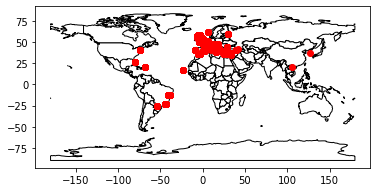

In [15]:
plot_locations(gdf)

In [35]:
_gdf = clean_geodataframe(gdf)

In [36]:
out_path = os.path.join(DATA_DIR, 'location_history.geojson')
save_geodataframe_as_geojson(_gdf, out_path)